<a href="https://colab.research.google.com/github/PRIYANSHU210021/PrePlacementPrediciton/blob/main/PrePlacePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/student_placement_data.csv')

In [105]:
# Features & Target
X = data[['CGPA', 'LeetCode_Rank', 'Projects', 'Internships', 'DSA_Skill', 'Communication_Skill']]
y = data['Placement_Status']


In [106]:
# Handle Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [107]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [108]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:

# Train Model with Class Weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [110]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.72      0.72      0.72        18

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



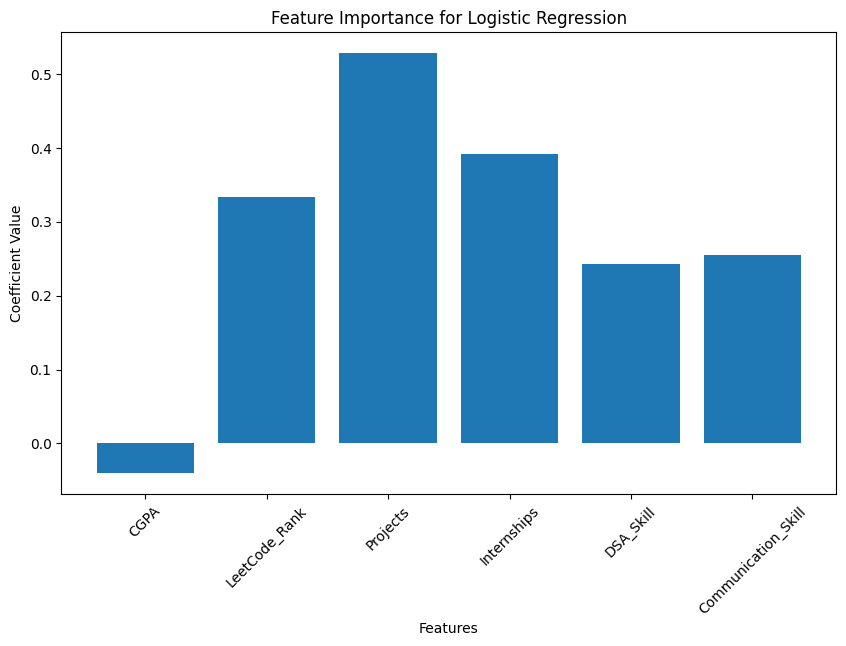

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients of the Logistic Regression model
coefficients = model.coef_[0]

# Feature names
features = X.columns

# Create a bar plot for the feature importance (coefficients)
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.title("Feature Importance for Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


In [111]:
def predict_placement(new_data):
    import pandas as pd
    new_data_df = pd.DataFrame([new_data], columns=X.columns)  # Convert to DataFrame
    new_data_scaled = scaler.transform(new_data_df)  # Now transform
    prediction = model.predict(new_data_scaled)
    return "Placed" if prediction[0] == 1 else "Not Placed"


In [119]:
new_student = [8.5, 1400, 3, 0, 3, 3]  # CGPA, LeetCode Rank, Projects, Internships, DSA Skill, Communication Skill
print("New Student Placement Prediction:", predict_placement(new_student))


New Student Placement Prediction: Placed
